In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.utils import io
from PyEyeSim import EyeData

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
Path='C:/Users/Utente/Documents/University/Courses/P1&P2/EyeMovementDat/'
FilePath=Path+'merged_manipulated.csv'
FixData=pd.read_csv(FilePath, sep=',',header=0, dtype={'subject': str})
print(np.shape(FixData))

(209676, 12)


In [4]:
# delete every row where the repetition is not 0 and record_number is not 0
FixData=FixData[FixData['repetition']==0]
FixData=FixData[FixData['record_number']==0]
print(np.shape(FixData))

(204187, 12)


dataset size:  (204187, 12)
presentation size:  x= 1920 pixels y= 1080  pixels
presentation size:  x= 1920 pixels y= 1080  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 200 subjects, and 36 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
run descriptive analysis
Data for  200 observers and  36  stimuli.


C:\Users\Utente\Documents\University\Master\PyEyeSim\PyEyeSim\__init__.py:281: UserWarning: Stim path not provided
  warnings.warn("Stim path not provided")


Mean fixation number:  29.03  +/-  8.24
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  7028
Mean X location:  482.3  +/-  88.7  pixels
Mean Y location:  469.4  +/-  64.7  pixels
Mean saccade  amplitude:  106.4  +/-  16.6  pixels
Mean scanpath  length:  2596.6  +/-  494.9  pixels
Data for  200 observers and  36  stimuli.
Mean fixation number:  29.03  +/-  8.24
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  7028
Mean X location:  482.3  +/-  88.7  pixels
Mean Y location:  469.4  +/-  64.7  pixels
Mean saccade  amplitude:  106.4  +/-  16.6  pixels
Mean scanpath  length:  2596.6  +/-  494.9  pixels


(array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30, 8881, 8882, 8883,
        8884, 8885, 8886], dtype=int64),
 array(['21418', '21422', '21463', '21468', '21469', '21474', '21480',
        '21498', '21513', '21522', '21526', '21531', '21568', '21629',
        '21630', '21636', '21641', '21653', '21658', '21667', '21680',
        '21683', '21685', '21699', '21706', '21735', '21774', '21811',
        '21819', '21820', '21862', '21878', '21889', '21927', '21930',
        '21939', '21946', '22018', '22036', '22108', '22109', '22127',
        '22129', '22138', '22149', '22168', '22174', '22180', '22181',
        '22186', '22204', '22214', '22219', '22228', '22234', '22239',
        '22242', '22261', '22271', '22279', '22291', '22322', '22324',
        '22327', '22341', '22346', '22376', '22378', '22383', '22388',
        '22394', '22410', '

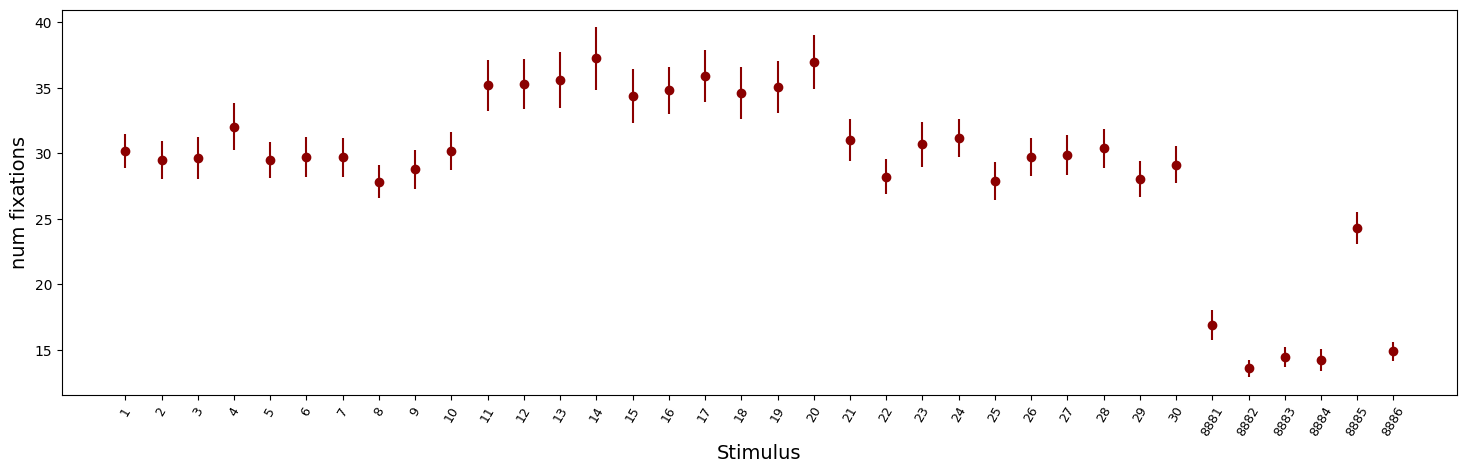

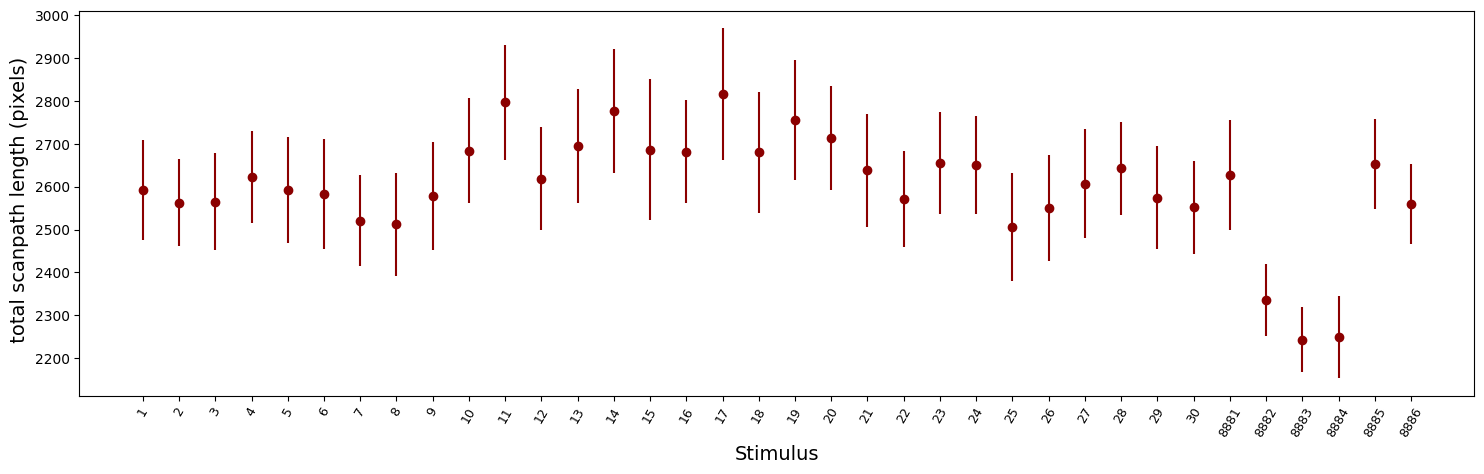

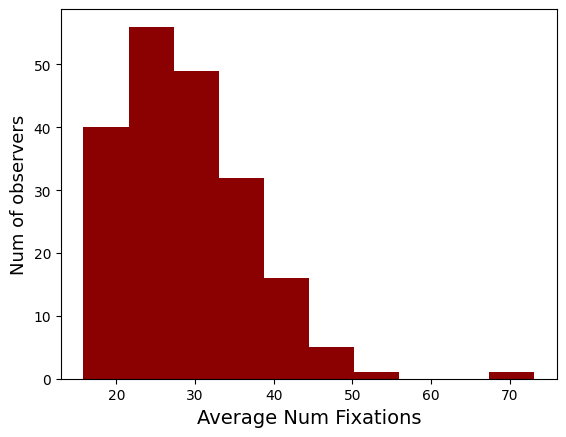

In [5]:

#sizeX,sizeY=1024, 768 
sizeX,sizeY=1920, 1080


DyslexiaDat=EyeData(FixData,sizeX,sizeY)
DyslexiaDat.DataInfo(mean_x='fix_x',mean_y='fix_y',FixDuration='duration_ms',Stimulus='stimulus',subjectID='subject')
DyslexiaDat.RunDescriptiveFix(Visual=1)

---

In [6]:
complete_data = []
missing_data = {}
subject_with_missing_data = {}
set_subj = set()
for i in range(0,36):
    FixGr=np.array(DyslexiaDat.nfix[0:117,i])
    if not np.isnan(FixGr).any():
        complete_data.append(i)
    if np.isnan(FixGr).any():
        missing_data[i] = np.isnan(FixGr).sum()
        for x in np.where(np.isnan(FixGr))[0]:
            subject_with_missing_data[x] = +1
            set_subj.add(x)


print(f'{len(complete_data)} Stimuli with complete data: {complete_data}')
print(f'{len(missing_data)} Stimuli with Missing data: {missing_data}')
print(f'Max subject that have not seen the stimulus: {max(missing_data.values())}')
print(f'{len(subject_with_missing_data)} Subjects with missing data: {subject_with_missing_data}')

10 Stimuli with complete data: [0, 3, 4, 5, 7, 15, 18, 28, 31, 32]
26 Stimuli with Missing data: {1: 1, 2: 1, 6: 1, 8: 1, 9: 1, 10: 3, 11: 3, 12: 2, 13: 3, 14: 1, 16: 2, 17: 1, 19: 2, 20: 1, 21: 1, 22: 1, 23: 1, 24: 2, 25: 1, 26: 2, 27: 1, 29: 1, 30: 1, 33: 1, 34: 2, 35: 3}
Max subject that have not seen the stimulus: 3
29 Subjects with missing data: {115: 1, 43: 1, 53: 1, 10: 1, 15: 1, 17: 1, 91: 1, 94: 1, 116: 1, 32: 1, 83: 1, 20: 1, 41: 1, 96: 1, 55: 1, 44: 1, 82: 1, 14: 1, 2: 1, 66: 1, 73: 1, 58: 1, 25: 1, 99: 1, 64: 1, 8: 1, 27: 1, 76: 1, 80: 1}


Here we check for the Munich subjects, the amount of stimuli and subject that have some empty data. In other words, we check for every subjects wich and how many stimuli they have not seen (or have been delete because with repetition > 0 and record_number > 0)

Over 36 stimuli 26 have at least one subject that have not seen them.

Over 117 subject only 20 have not seen at least one stimuli (actually every of these subjects have got a proble with one stimulus).

We can consider to remove this 20 subject from the dataset (that correspond to around 17% of the total), or consider to use only the 10 stimui that have full data for every subject, or every time that we randomly select a combination of stimulus/subject check if the subject has seen the stimulus and if not substitute it with another one.

---

In [7]:
WhichC, WhichCN = DyslexiaDat.GetGroups('Group')

Conditions [ 1.  2.  3.  4. nan]


In [8]:
WhichC = np.array(WhichC, dtype=float)
WhichC[np.isnan(WhichC)] = 4
WhichC = WhichC.astype(int)
WhichC[WhichC == 0] = 1
WhichC[WhichC == 2] = 0
WhichC[WhichC == 3] = 0
WhichC[WhichC == 4] = 0
WhichC

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0])

In [9]:
# convert WhichCN to a numpy array of type float
WhichCN = np.array(WhichCN, dtype=float)
# substitute nan values with max value + 1
WhichCN[np.isnan(WhichCN)] = 0 
WhichCN = WhichCN.astype(int)
# Trasform all 4 in 0
WhichCN[WhichCN == 4] = 0
WhichCN[WhichCN == 3] = 0
# Trasform all 1,2 in 1
WhichCN[WhichCN == 2] = 1
WhichCN

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0])

In [10]:
# create a list of subjects from 117 to 200
GrazSubs = DyslexiaDat.subjects[117:200]
GrazSubs_Idx = list(range(117,200))
MunichSubs_Idx = list(range(0,117))

## MLP

We define a multilayer perceptron (MLP) to train over specific features extracted from the data.

In [11]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

In [12]:
list(set_subj)

[2,
 8,
 10,
 14,
 15,
 17,
 20,
 25,
 27,
 32,
 41,
 43,
 44,
 53,
 55,
 58,
 64,
 66,
 73,
 76,
 80,
 82,
 83,
 91,
 94,
 96,
 99,
 115,
 116]

In [13]:
from scipy.stats import entropy
def get_entropy(self, subj, stim):
    # get fixation (array([x]), array([y]))
    fixations = DyslexiaDat.GetFixationData(DyslexiaDat.subjects[subj], DyslexiaDat.stimuli[stim])
    # calculate entropy of the fixation distribution
    sizeX = self.x_size
    sizeY = self.y_size
    x = fixations[0].tolist()
    y = fixations[1].tolist()
    # create a 2D histogram
    H, xedges, yedges = np.histogram2d(x, y, bins=(sizeX, sizeY))
    # normalize the histogram
    H = H / H.sum()
    # calculate entropy
    ent = entropy(H.flatten())
    return ent

In [14]:
def GlobalFeature(self, Saccades, stim):
    Features = np.empty((self.ns), dtype=object)
    for s in range(self.ns):
        angles = []
        progressive_s = 0
        regressive_s = 0
        for saccade in Saccades[s][stim]:
            angles.append(saccade.Angle())
            if saccade.Angle() > 270 or saccade.Angle() < 90:
                progressive_s += 1
            elif saccade.Angle() > 90 and saccade.Angle() < 270:
                regressive_s += 1
        
        fix_durations = DyslexiaDat.GetDurations(DyslexiaDat.subjects[s], DyslexiaDat.stimuli[stim])

        Features[s] = {'number_fixation':  self.nfixations[s][stim],
                       'fixation_entropy': get_entropy(self, s, stim),
                       'mean_fixation_duration': np.mean(fix_durations),
                       'std_fixation_duration': np.std(fix_durations),
                       'total_reading_duration': np.sum(fix_durations),
                       'mean_saccade_amplitude': np.mean(angles),
                       'std_saccade_amplitude': np.std(angles),
                       'regression': regressive_s,
                       'progression/regression': regressive_s if regressive_s == 0 else progressive_s/regressive_s
                        }
    return Features

In [15]:
stimuli = list(range(0, 30))

In [16]:
GlobalFeature_array = []
Saccades = DyslexiaDat.GetSaccades()
for stim in stimuli:
    GlobalFeature_array.append(GlobalFeature(DyslexiaDat, Saccades, stim))
    print(f'Global features for stimulus {stim+1} calculated')

C:\Users\Utente\AppData\Local\Temp\ipykernel_22172\641606591.py:13: RuntimeWarning: invalid value encountered in divide
  H = H / H.sum()
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered i

Global features for stimulus 1 calculated
Global features for stimulus 2 calculated
Global features for stimulus 3 calculated
Global features for stimulus 4 calculated
Global features for stimulus 5 calculated
Global features for stimulus 6 calculated
Global features for stimulus 7 calculated
Global features for stimulus 8 calculated
Global features for stimulus 9 calculated
Global features for stimulus 10 calculated
Global features for stimulus 11 calculated
Global features for stimulus 12 calculated
Global features for stimulus 13 calculated
Global features for stimulus 14 calculated
Global features for stimulus 15 calculated
Global features for stimulus 16 calculated
Global features for stimulus 17 calculated
Global features for stimulus 18 calculated
Global features for stimulus 19 calculated
Global features for stimulus 20 calculated
Global features for stimulus 21 calculated
Global features for stimulus 22 calculated
Global features for stimulus 23 calculated
Global features for 

In [17]:
SaccadeObj = DyslexiaDat.GetSaccades()

In [18]:
Saccade = DyslexiaDat.SaccadeSel(SaccadeObj, nHor=1, nVer=1)

In [19]:
Saccade.shape

(200, 36, 1, 1)

In [20]:
SimMatrix = DyslexiaDat.SacSim1Group(Saccade, method='peak180', match=True, Thr=0)

In [21]:
SimMatrix.shape

(200, 200, 36, 1, 1)

In [22]:
from PyEyeSim.scanpathsimhelper import CreatAoiRects

AOIRects = CreatAoiRects(1, 1, DyslexiaDat.x_size, DyslexiaDat.y_size, allsame=DyslexiaDat.np)

In [23]:
Features = np.empty((DyslexiaDat.ns, len(stimuli),  1, 1), dtype=object)
for stim in stimuli:
    Features[:,stim,:,:] = DyslexiaDat.FeatureExtraction(SaccadeObj, Saccade[:,stim,:,:], nHor=1, stim=stim, nVer=1, AOIRects=AOIRects)
    print(f'Features for stimulus {stim+1} calculated')

C:\Users\Utente\Documents\University\Master\PyEyeSim\PyEyeSim\_scanpathsim.py:727: RuntimeWarning: Mean of empty slice
  'mean_fixation_duration': np.nanmean(duration),


Features for stimulus 1 calculated
Features for stimulus 2 calculated
Features for stimulus 3 calculated
Features for stimulus 4 calculated
Features for stimulus 5 calculated
Features for stimulus 6 calculated
Features for stimulus 7 calculated
Features for stimulus 8 calculated
Features for stimulus 9 calculated
Features for stimulus 10 calculated
Features for stimulus 11 calculated
Features for stimulus 12 calculated
Features for stimulus 13 calculated
Features for stimulus 14 calculated
Features for stimulus 15 calculated
Features for stimulus 16 calculated
Features for stimulus 17 calculated
Features for stimulus 18 calculated
Features for stimulus 19 calculated
Features for stimulus 20 calculated
Features for stimulus 21 calculated
Features for stimulus 22 calculated
Features for stimulus 23 calculated
Features for stimulus 24 calculated
Features for stimulus 25 calculated
Features for stimulus 26 calculated
Features for stimulus 27 calculated
Features for stimulus 28 calculated
F

In [24]:
Features.shape

(200, 30, 1, 1)

In [25]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
#  Calculate training and test data for different folds
train_subjects = []
test_subjects = []
training_Vals = []
labels_train = []
test_Vals = []
labels_test = []

subj = list(set(MunichSubs_Idx) - set_subj)

labels = np.array([WhichCN[sub] for sub in subj])

for i in range(100):
    train_subj, test_subj = train_test_split(
        subj, 
        test_size=0.1, 
        random_state=i,
        stratify=labels
    )

    train_subjects.append(train_subj)
    test_subjects.append(test_subj)

    remove_subj = np.append(test_subj, np.array(GrazSubs_Idx))

    # Train set
    temp = []
    for stim in stimuli:
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, inferS=False, method='peak180', match=True, Thr=0, nosubj=list(remove_subj), SaccadeObj=SaccadeObj, Saccades=Saccade[:,stim,:,:], Features=Features[:,stim,:,:], SimMatrix=SimMatrix[:,:, stim, :,:])
        temp.append(SimAndFeatureVals)
    
    training_Vals.append(temp)
    labels_train.append(np.array([WhichCN[sub] for sub in train_subj]))


    # Test set
    temp = []
    for stim in stimuli:
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, inferS=False, method='peak180', match=True, Thr=0, nosubj=list(remove_subj), SaccadeObj=SaccadeObj, Saccades=Saccade[:,stim,:,:], Features=Features[:,stim,:,:], SimMatrix=SimMatrix[:,:, stim, :,:]) 
        temp.append(SimAndFeatureVals)
    
    test_Vals.append(temp)
    labels_test.append(np.array([WhichCN[sub] for sub in test_subj]))

In [26]:
print(len(training_Vals))
print(len(training_Vals[0])) # 30 stimuli
print(len(training_Vals[0][0])) # 79 train subjects so 79 values for each group
print(len(test_Vals[0][0])) # 9 test subjects

100
30
79
9


In [27]:
training_Vals[0][5][9][0][0][4] # mean saccade similarity group 0 subject with index 10 in the training list for stimulus 5 of the first fold

0.73253015987371

---

In [28]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from captum.attr import IntegratedGradients

def explain_prediction(model, input_tensor, target_class=None):
    model.eval()
    
    # Ensure input has batch dimension
    if len(input_tensor.shape) == 1:
        input_tensor = input_tensor.unsqueeze(0)
    
    # Ensure input requires grad
    input_tensor = input_tensor.requires_grad_(True)
    
    ig = IntegratedGradients(model)
    
    # If target_class is None, use the predicted class
    if target_class is None:
        with torch.no_grad():
            pred = model(input_tensor)
            target_class = pred.argmax(dim=1)
    else:
        # Ensure target_class is proper tensor format
        if isinstance(target_class, (int, np.integer)):
            target_class = torch.tensor([target_class])
        elif isinstance(target_class, np.ndarray):
            target_class = torch.from_numpy(target_class)
    
    # Get attributions
    attributions, approximation_error = ig.attribute(
        input_tensor, 
        target=target_class, 
        return_convergence_delta=True
    )
    return attributions, approximation_error

def visualize_attribution_boxplot(attribution_matrix, feature_names):
    """
    Create a box plot showing the distribution of attributions across stimuli
    
    Args:
        attribution_matrix: Shape (n_features, n_stimuli) - attributions for each feature across stimuli
        feature_names: List of feature names
    """
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Create box plot
    box_data = [attribution_matrix[i, :] for i in range(len(feature_names))]
    bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True, 
                    showmeans=True, meanline=True)
    
    # Color boxes based on mean attribution (red for negative, blue for positive)
    means = [np.mean(data) for data in box_data]
    for patch, mean_val in zip(bp['boxes'], means):
        if mean_val < 0:
            patch.set_facecolor('lightcoral')
        else:
            patch.set_facecolor('lightblue')
    
    # Customize the plot
    ax.set_ylabel("Attribution Score")
    ax.set_title("Feature Attribution Distribution Across Stimuli\n(Box=IQR, Whiskers=1.5×IQR, Orange=Mean, Green-Dotted=Median, White-Circle=Outliers)")
    ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)  # Add zero line
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nFeature Attribution Summary:")
    print("-" * 60)
    for i, name in enumerate(feature_names):
        data = attribution_matrix[i, :]
        print(f"{name:30s}: Mean={np.mean(data):7.4f}, Std={np.std(data):7.4f}, "
              f"Min={np.min(data):7.4f}, Max={np.max(data):7.4f}")

def visualize_attribution_comparison(attribution_matrix, feature_names):
    """
    Create both bar plot (means) and box plot side by side
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Left plot: Traditional bar plot with error bars
    means = np.mean(attribution_matrix, axis=1)
    stds = np.std(attribution_matrix, axis=1)
    colors = ['red' if x < 0 else 'blue' for x in means]
    
    ax1.barh(feature_names, means, xerr=stds, color=colors, alpha=0.7, capsize=5)
    ax1.set_xlabel("Attribution Score")
    ax1.set_title("Mean Attribution ± Std Dev")
    ax1.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    # Right plot: Box plot
    box_data = [attribution_matrix[i, :] for i in range(len(feature_names))]
    bp = ax2.boxplot(box_data, labels=range(len(feature_names)), patch_artist=True,
                     showmeans=True, meanline=True, vert=False)
    
    # Color boxes
    for patch, mean_val in zip(bp['boxes'], means):
        if mean_val < 0:
            patch.set_facecolor('lightcoral')
        else:
            patch.set_facecolor('lightblue')
    
    ax2.set_yticks(range(1, len(feature_names) + 1))
    ax2.set_yticklabels(feature_names)
    ax2.set_xlabel("Attribution Score")
    ax2.set_title("Attribution Distribution (Box Plot)")
    ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [29]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 11))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [30]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
    def forward(self, x): 
        return x

In [31]:
def train_test_pipeline(stimuli, momentum = 0.8):
    torch.manual_seed(42)
    np.random.seed(42)
    results = []
    accuracy = []
    conf_matrix = np.zeros((2, 2))

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    for i in range(100):
        best_loss = np.inf

        vector_roi = np.array([])
        for idx, _ in enumerate(stimuli):
            vector_roi = vectorize(training_Vals[i][idx], subj=train_subjects[i], stim=idx, vec=vector_roi)
            
        # apply standardization
        scaler = StandardScaler()
        vector_roi = scaler.fit_transform(vector_roi)

        # Train set
        X_train = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_train = torch.tensor(labels_train[i], dtype=torch.long).to(device) 

        vector_roi = np.array([])
        for idx, _ in enumerate(stimuli):
            vector_roi = vectorize(test_Vals[i][idx], subj=test_subjects[i], stim=idx, vec=vector_roi)
        
        # apply standardization
        scaler = StandardScaler()
        vector_roi = scaler.fit_transform(vector_roi)
        # Test set
        X_test = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_test = torch.tensor(labels_test[i], dtype=torch.long).to(device) 

        # Initialize the model, loss function, and optimizer
        model = NN().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=0.2, momentum=momentum)

        # Train the model
        model.train()
        for epoch in range(20):  # number of epochs
            optimizer.zero_grad()
            outputs = model(X_train)
            loss = criterion(outputs, y_train)
            loss.backward()
            optimizer.step()
            # print loss every 5 epochs
            if epoch % 5 == 0:
                print(f'Epoch {epoch} loss: {loss.item()}')

            if loss < best_loss:
                # save checkpoint
                checkpoint = {'model': model, 'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
                best_loss = loss

        # Load the best model
        model.load_state_dict(checkpoint['state_dict'])
        model.eval()
        with torch.no_grad():
            outputs = model(X_test)
            predictions = torch.argmax(outputs, dim=1)  # Take the class with highest probability
            accuracy.append(accuracy_score(y_test.cpu(), predictions.cpu()))
            conf_matrix += confusion_matrix(y_test.cpu(), predictions.cpu())
        # Save data
        results.append({
            'model': model,
            'X_train': X_train,
            'y_train': y_train,
            'X_test': X_test,
            'y_test': y_test,
            'predictions': predictions.cpu().numpy(),
            'accuracy': accuracy[-1],
            'conf_matrix': conf_matrix
        })

    # Results
    accuracy = np.array(accuracy)
    print(f'Average accuracy: {np.mean(accuracy)}')
    print(f'Standard deviation: {np.std(accuracy)}')
    print(f'Total confusion matrix:\n{conf_matrix}')
    print(f'False positives: {conf_matrix[0, 1]}')
    print(f'False negatives: {conf_matrix[1, 0]}')

    return results

#### Original

In [32]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 7))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['mean_fixation_duration']
        vector_roi[s][3] = Features['total_reading_duration']
        vector_roi[s][4] = Features['regression']
        vector_roi[s][5] = Features['progression/regression']
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
    
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [33]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(210, 110)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(110, 55)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(55, 27) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(27, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7115766406059265
Epoch 5 loss: 0.4136336147785187
Epoch 10 loss: 0.340735524892807
Epoch 15 loss: 0.31918948888778687
Epoch 0 loss: 0.7483662366867065
Epoch 5 loss: 0.40916115045547485
Epoch 10 loss: 0.35268840193748474
Epoch 15 loss: 0.3204600512981415
Epoch 0 loss: 0.6998936533927917
Epoch 5 loss: 0.3909400701522827
Epoch 10 loss: 0.32342642545700073
Epoch 15 loss: 0.31448012590408325
Epoch 0 loss: 0.7445697784423828
Epoch 5 loss: 0.4155961573123932
Epoch 10 loss: 0.34731370210647583
Epoch 15 loss: 0.33122244477272034
Epoch 0 loss: 0.730110228061676
Epoch 5 loss: 0.38375359773635864
Epoch 10 loss: 0.3547280728816986
Epoch 15 loss: 0.31460440158843994
Epoch 0 loss: 0.7446630001068115
Epoch 5 loss: 0.4494793117046356
Epoch 10 loss: 0.3563416302204132
Epoch 15 loss: 0.3346060812473297
Epoch 0 loss: 0.7237708568572998
Epoch 5 loss: 0.41682037711143494
Epoch 10 loss: 0.3518672287464142
Epoch 15 loss: 0.3293512463569641
Epoch 0 loss: 0.7066447734832764
Ep

In [34]:
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7115766406059265
Epoch 5 loss: 0.449920654296875
Epoch 10 loss: 0.3703135848045349
Epoch 15 loss: 0.3367891311645508
Epoch 0 loss: 0.7483662366867065
Epoch 5 loss: 0.4351336359977722
Epoch 10 loss: 0.3862878978252411
Epoch 15 loss: 0.3404303789138794
Epoch 0 loss: 0.6998936533927917
Epoch 5 loss: 0.41855499148368835
Epoch 10 loss: 0.3594455420970917
Epoch 15 loss: 0.32857546210289
Epoch 0 loss: 0.7445697784423828
Epoch 5 loss: 0.42330700159072876
Epoch 10 loss: 0.37090322375297546
Epoch 15 loss: 0.33935362100601196
Epoch 0 loss: 0.730110228061676
Epoch 5 loss: 0.4074060916900635
Epoch 10 loss: 0.38860708475112915
Epoch 15 loss: 0.3282371759414673
Epoch 0 loss: 0.7446630001068115
Epoch 5 loss: 0.48493608832359314
Epoch 10 loss: 0.38942456245422363
Epoch 15 loss: 0.36213892698287964
Epoch 0 loss: 0.7237708568572998
Epoch 5 loss: 0.44036298990249634
Epoch 10 loss: 0.3682658076286316
Epoch 15 loss: 0.35659703612327576
Epoch 0 loss: 0.7066447734832764
Epoc

Approximation Error: -8.61381267895922e-05 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_22172\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


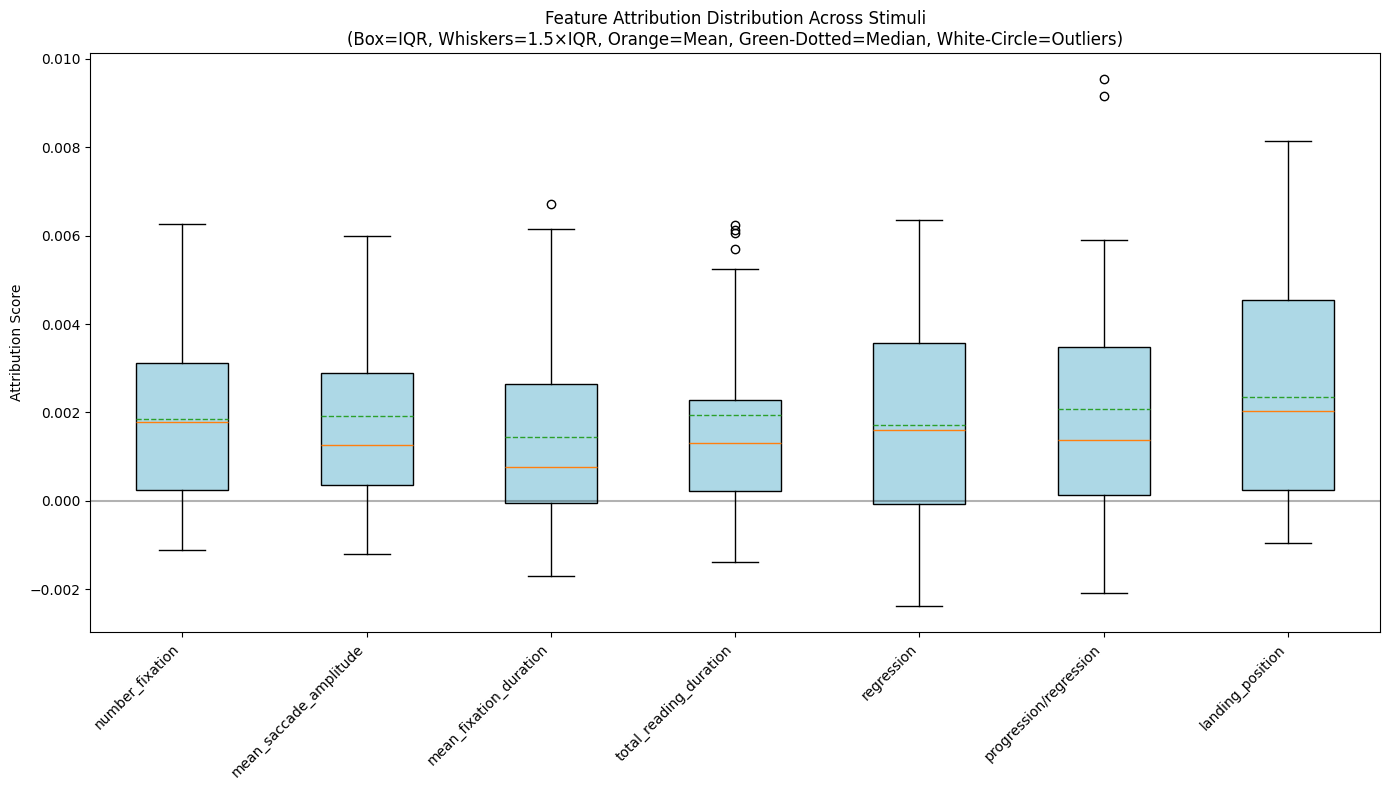


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0019, Std= 0.0020, Min=-0.0011, Max= 0.0063
mean_saccade_amplitude        : Mean= 0.0019, Std= 0.0021, Min=-0.0012, Max= 0.0060
mean_fixation_duration        : Mean= 0.0014, Std= 0.0021, Min=-0.0017, Max= 0.0067
total_reading_duration        : Mean= 0.0019, Std= 0.0022, Min=-0.0014, Max= 0.0062
regression                    : Mean= 0.0017, Std= 0.0022, Min=-0.0024, Max= 0.0064
progression/regression        : Mean= 0.0021, Std= 0.0028, Min=-0.0021, Max= 0.0095
landing_position              : Mean= 0.0023, Std= 0.0026, Min=-0.0010, Max= 0.0081


In [35]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original (without mean saccade amplitude)

In [36]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 6))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_fixation_duration']
        vector_roi[s][2] = Features['total_reading_duration']
        vector_roi[s][3] = Features['regression']
        vector_roi[s][4] = Features['progression/regression']
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][3]

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [37]:
# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(180, 90)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(90, 45)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(45, 23) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(23, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7667861580848694
Epoch 5 loss: 0.4791272282600403
Epoch 10 loss: 0.3810610771179199
Epoch 15 loss: 0.34507107734680176
Epoch 0 loss: 0.7700377702713013
Epoch 5 loss: 0.42339828610420227
Epoch 10 loss: 0.35790035128593445
Epoch 15 loss: 0.3275423049926758
Epoch 0 loss: 0.7439738512039185
Epoch 5 loss: 0.41909128427505493
Epoch 10 loss: 0.3236769735813141
Epoch 15 loss: 0.31740209460258484
Epoch 0 loss: 0.7108564376831055
Epoch 5 loss: 0.42761746048927307
Epoch 10 loss: 0.3413400650024414
Epoch 15 loss: 0.3319671154022217
Epoch 0 loss: 0.7469186186790466
Epoch 5 loss: 0.4475939869880676
Epoch 10 loss: 0.360322505235672
Epoch 15 loss: 0.32169944047927856
Epoch 0 loss: 0.7289536595344543
Epoch 5 loss: 0.5187522172927856
Epoch 10 loss: 0.39133331179618835
Epoch 15 loss: 0.34508392214775085
Epoch 0 loss: 0.8224056363105774
Epoch 5 loss: 0.44072091579437256
Epoch 10 loss: 0.3547520339488983
Epoch 15 loss: 0.3258717358112335
Epoch 0 loss: 0.708872377872467
Ep

In [38]:
_ = train_test_pipeline(stimuli, 0.6)

Using device: cuda
Epoch 0 loss: 0.7667861580848694
Epoch 5 loss: 0.5011082291603088
Epoch 10 loss: 0.4034900963306427
Epoch 15 loss: 0.3696376085281372
Epoch 0 loss: 0.7700377702713013
Epoch 5 loss: 0.44703805446624756
Epoch 10 loss: 0.37959688901901245
Epoch 15 loss: 0.35214754939079285
Epoch 0 loss: 0.7439738512039185
Epoch 5 loss: 0.43707236647605896
Epoch 10 loss: 0.34394314885139465
Epoch 15 loss: 0.33170247077941895
Epoch 0 loss: 0.7108564376831055
Epoch 5 loss: 0.4518525302410126
Epoch 10 loss: 0.3772217333316803
Epoch 15 loss: 0.34232819080352783
Epoch 0 loss: 0.7469186186790466
Epoch 5 loss: 0.4618847966194153
Epoch 10 loss: 0.3750484883785248
Epoch 15 loss: 0.34515464305877686
Epoch 0 loss: 0.7289536595344543
Epoch 5 loss: 0.55863356590271
Epoch 10 loss: 0.41494667530059814
Epoch 15 loss: 0.3816075325012207
Epoch 0 loss: 0.8224056363105774
Epoch 5 loss: 0.4653477668762207
Epoch 10 loss: 0.367838054895401
Epoch 15 loss: 0.3435284495353699
Epoch 0 loss: 0.708872377872467
Epoch

Approximation Error: 0.00019481650087982416 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_22172\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


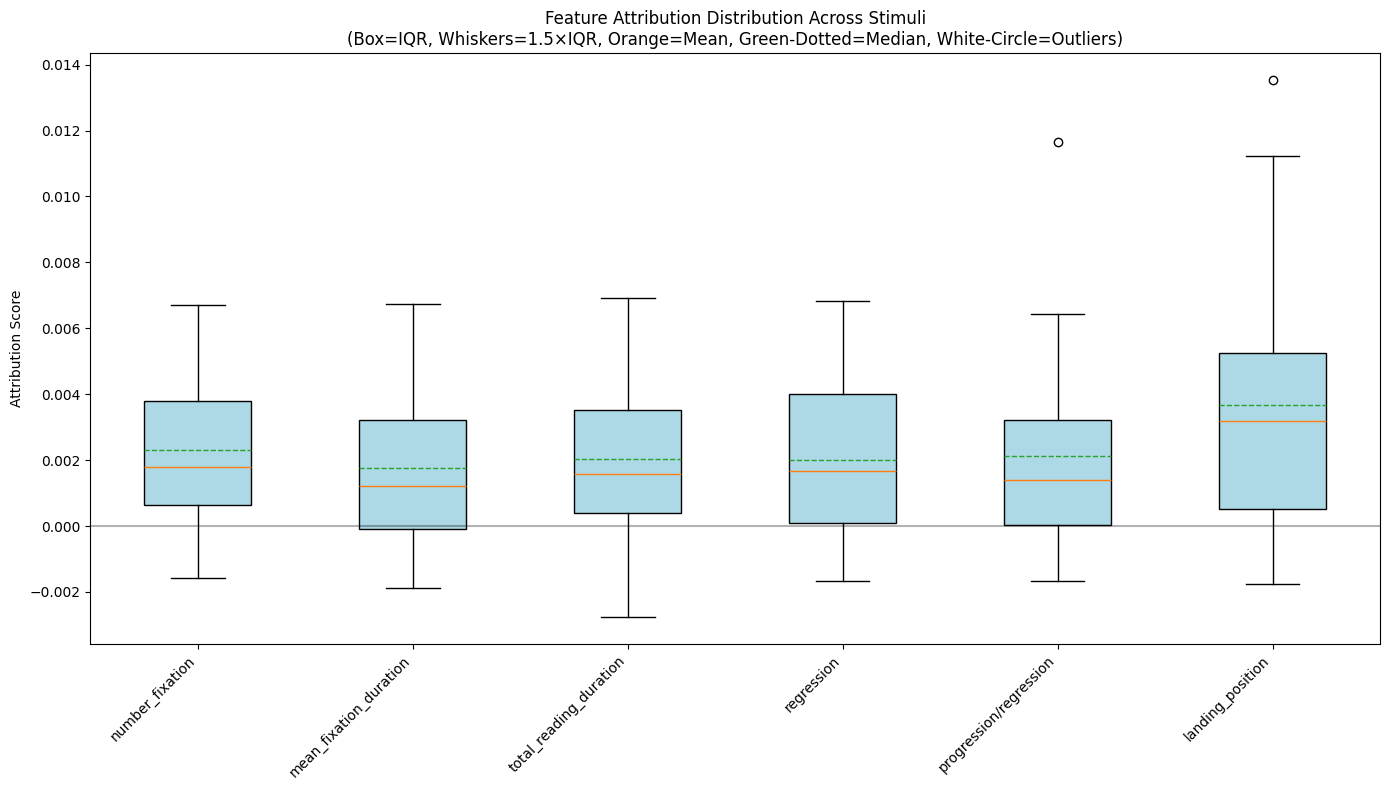


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0023, Std= 0.0023, Min=-0.0016, Max= 0.0067
mean_fixation_duration        : Mean= 0.0018, Std= 0.0025, Min=-0.0019, Max= 0.0067
total_reading_duration        : Mean= 0.0020, Std= 0.0025, Min=-0.0028, Max= 0.0069
regression                    : Mean= 0.0020, Std= 0.0023, Min=-0.0017, Max= 0.0068
progression/regression        : Mean= 0.0021, Std= 0.0029, Min=-0.0017, Max= 0.0116
landing_position              : Mean= 0.0037, Std= 0.0039, Min=-0.0018, Max= 0.0135


In [39]:
feature_names = [
    "number_fixation",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original + Additional Features

In [40]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 10))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['std_saccade_amplitude']
        vector_roi[s][3] = Features['mean_fixation_duration']
        vector_roi[s][4] = Features['std_fixation_duration']
        vector_roi[s][5] = Features['total_reading_duration']
        vector_roi[s][6] = Features['regression']
        vector_roi[s][7] = Features['progression/regression']
        vector_roi[s][8] = Features['fixation_entropy']
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
    
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [41]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(300, 150)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(150, 75)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(75, 33) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(33, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.8214497566223145
Epoch 5 loss: 0.40419402718544006
Epoch 10 loss: 0.3362760543823242
Epoch 15 loss: 0.3146214485168457
Epoch 0 loss: 0.7904959321022034
Epoch 5 loss: 0.3945804834365845
Epoch 10 loss: 0.34578827023506165
Epoch 15 loss: 0.3175537586212158
Epoch 0 loss: 0.7641640901565552
Epoch 5 loss: 0.37409481406211853
Epoch 10 loss: 0.31972748041152954
Epoch 15 loss: 0.3152789771556854
Epoch 0 loss: 0.6239690780639648
Epoch 5 loss: 0.35475510358810425
Epoch 10 loss: 0.31927669048309326
Epoch 15 loss: 0.3168455958366394
Epoch 0 loss: 0.7035930156707764
Epoch 5 loss: 0.36048540472984314
Epoch 10 loss: 0.32058030366897583
Epoch 15 loss: 0.31382784247398376
Epoch 0 loss: 0.6872652173042297
Epoch 5 loss: 0.3874540627002716
Epoch 10 loss: 0.3331656754016876
Epoch 15 loss: 0.32827597856521606
Epoch 0 loss: 0.7150274515151978
Epoch 5 loss: 0.3792348802089691
Epoch 10 loss: 0.3271421194076538
Epoch 15 loss: 0.32307156920433044
Epoch 0 loss: 0.6621307730674744

In [42]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.8214497566223145
Epoch 5 loss: 0.4124031066894531
Epoch 10 loss: 0.35696059465408325
Epoch 15 loss: 0.32656702399253845
Epoch 0 loss: 0.7904959321022034
Epoch 5 loss: 0.42200934886932373
Epoch 10 loss: 0.37388020753860474
Epoch 15 loss: 0.3482432961463928
Epoch 0 loss: 0.7641640901565552
Epoch 5 loss: 0.40022793412208557
Epoch 10 loss: 0.3424680829048157
Epoch 15 loss: 0.3295976519584656
Epoch 0 loss: 0.6239690780639648
Epoch 5 loss: 0.37723061442375183
Epoch 10 loss: 0.3428790271282196
Epoch 15 loss: 0.33633989095687866
Epoch 0 loss: 0.7035930156707764
Epoch 5 loss: 0.3756249248981476
Epoch 10 loss: 0.34306561946868896
Epoch 15 loss: 0.32299795746803284
Epoch 0 loss: 0.6872652173042297
Epoch 5 loss: 0.4033035337924957
Epoch 10 loss: 0.3518695533275604
Epoch 15 loss: 0.3432517349720001
Epoch 0 loss: 0.7150274515151978
Epoch 5 loss: 0.4013661742210388
Epoch 10 loss: 0.35992148518562317
Epoch 15 loss: 0.3441348969936371
Epoch 0 loss: 0.6621307730674744


Approximation Error: 1.689296550466679e-05 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_22172\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


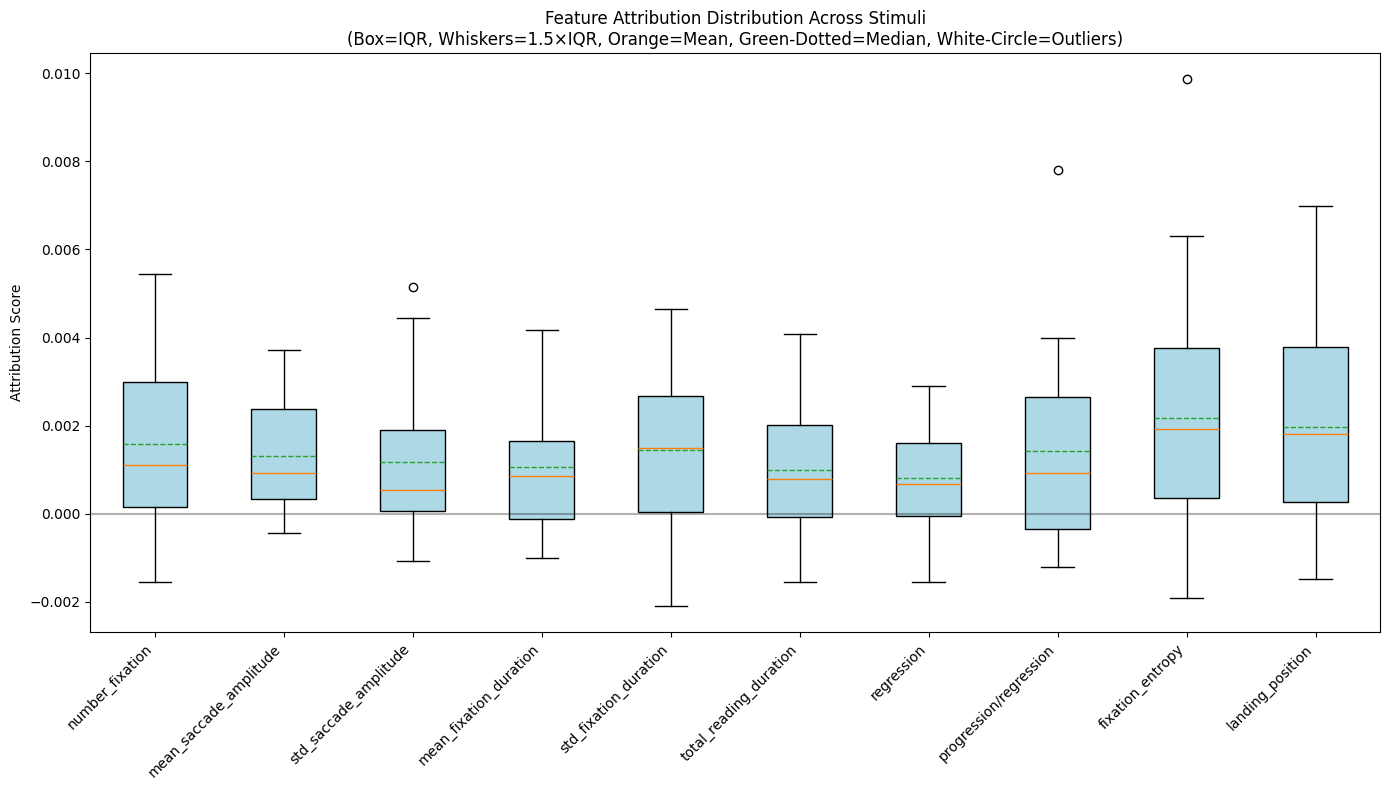


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0016, Std= 0.0018, Min=-0.0015, Max= 0.0054
mean_saccade_amplitude        : Mean= 0.0013, Std= 0.0013, Min=-0.0004, Max= 0.0037
std_saccade_amplitude         : Mean= 0.0012, Std= 0.0017, Min=-0.0011, Max= 0.0052
mean_fixation_duration        : Mean= 0.0011, Std= 0.0014, Min=-0.0010, Max= 0.0042
std_fixation_duration         : Mean= 0.0015, Std= 0.0016, Min=-0.0021, Max= 0.0047
total_reading_duration        : Mean= 0.0010, Std= 0.0014, Min=-0.0015, Max= 0.0041
regression                    : Mean= 0.0008, Std= 0.0012, Min=-0.0015, Max= 0.0029
progression/regression        : Mean= 0.0014, Std= 0.0020, Min=-0.0012, Max= 0.0078
fixation_entropy              : Mean= 0.0022, Std= 0.0025, Min=-0.0019, Max= 0.0099
landing_position              : Mean= 0.0020, Std= 0.0023, Min=-0.0015, Max= 0.0070


In [43]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "std_saccade_amplitude",
    "mean_fixation_duration",
    "std_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "fixation_entropy",
    "landing_position"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original and Similarity features (Avg + Std)

In [44]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 11))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['mean_fixation_duration']
        vector_roi[s][3] = Features['total_reading_duration']
        vector_roi[s][4] = Features['regression']
        vector_roi[s][5] = Features['progression/regression']
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][8] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][6] # std saccade similarity group 0
        vector_roi[s][10] = SimAndFeatureVals[s][0][0][7] # std saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [45]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(330, 165)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(165, 83)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(83, 42) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(42, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [46]:
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7110342383384705
Epoch 5 loss: 0.36995169520378113
Epoch 10 loss: 0.34494760632514954
Epoch 15 loss: 0.32595208287239075
Epoch 0 loss: 0.6952664256095886
Epoch 5 loss: 0.3764285743236542
Epoch 10 loss: 0.3298022449016571
Epoch 15 loss: 0.31570443511009216
Epoch 0 loss: 0.7548121213912964
Epoch 5 loss: 0.3839262127876282
Epoch 10 loss: 0.3350914418697357
Epoch 15 loss: 0.31698164343833923
Epoch 0 loss: 0.7384027242660522
Epoch 5 loss: 0.4014812707901001
Epoch 10 loss: 0.3338678181171417
Epoch 15 loss: 0.32120686769485474
Epoch 0 loss: 0.6873114109039307
Epoch 5 loss: 0.406865656375885
Epoch 10 loss: 0.3702397644519806
Epoch 15 loss: 0.3281695246696472
Epoch 0 loss: 0.7103297710418701
Epoch 5 loss: 0.41794291138648987
Epoch 10 loss: 0.3424411118030548
Epoch 15 loss: 0.3214019536972046
Epoch 0 loss: 0.792954683303833
Epoch 5 loss: 0.3994767963886261
Epoch 10 loss: 0.3249658942222595
Epoch 15 loss: 0.32155290246009827
Epoch 0 loss: 0.7177137732505798
Epoc

In [47]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7110342383384705
Epoch 5 loss: 0.3902316093444824
Epoch 10 loss: 0.3454403579235077
Epoch 15 loss: 0.33141306042671204
Epoch 0 loss: 0.6952664256095886
Epoch 5 loss: 0.3966413140296936
Epoch 10 loss: 0.3542257845401764
Epoch 15 loss: 0.33839625120162964
Epoch 0 loss: 0.7548121213912964
Epoch 5 loss: 0.4093761146068573
Epoch 10 loss: 0.34411269426345825
Epoch 15 loss: 0.3259621560573578
Epoch 0 loss: 0.7384027242660522
Epoch 5 loss: 0.43248072266578674
Epoch 10 loss: 0.3635346293449402
Epoch 15 loss: 0.3416215479373932
Epoch 0 loss: 0.6873114109039307
Epoch 5 loss: 0.4400414526462555
Epoch 10 loss: 0.3800622522830963
Epoch 15 loss: 0.34040170907974243
Epoch 0 loss: 0.7103297710418701
Epoch 5 loss: 0.4556729197502136
Epoch 10 loss: 0.3641470670700073
Epoch 15 loss: 0.3424832820892334
Epoch 0 loss: 0.792954683303833
Epoch 5 loss: 0.4229238033294678
Epoch 10 loss: 0.3496240973472595
Epoch 15 loss: 0.3399733006954193
Epoch 0 loss: 0.7177137732505798
Epoch 

Approximation Error: 3.0310318834381178e-05 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_22172\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


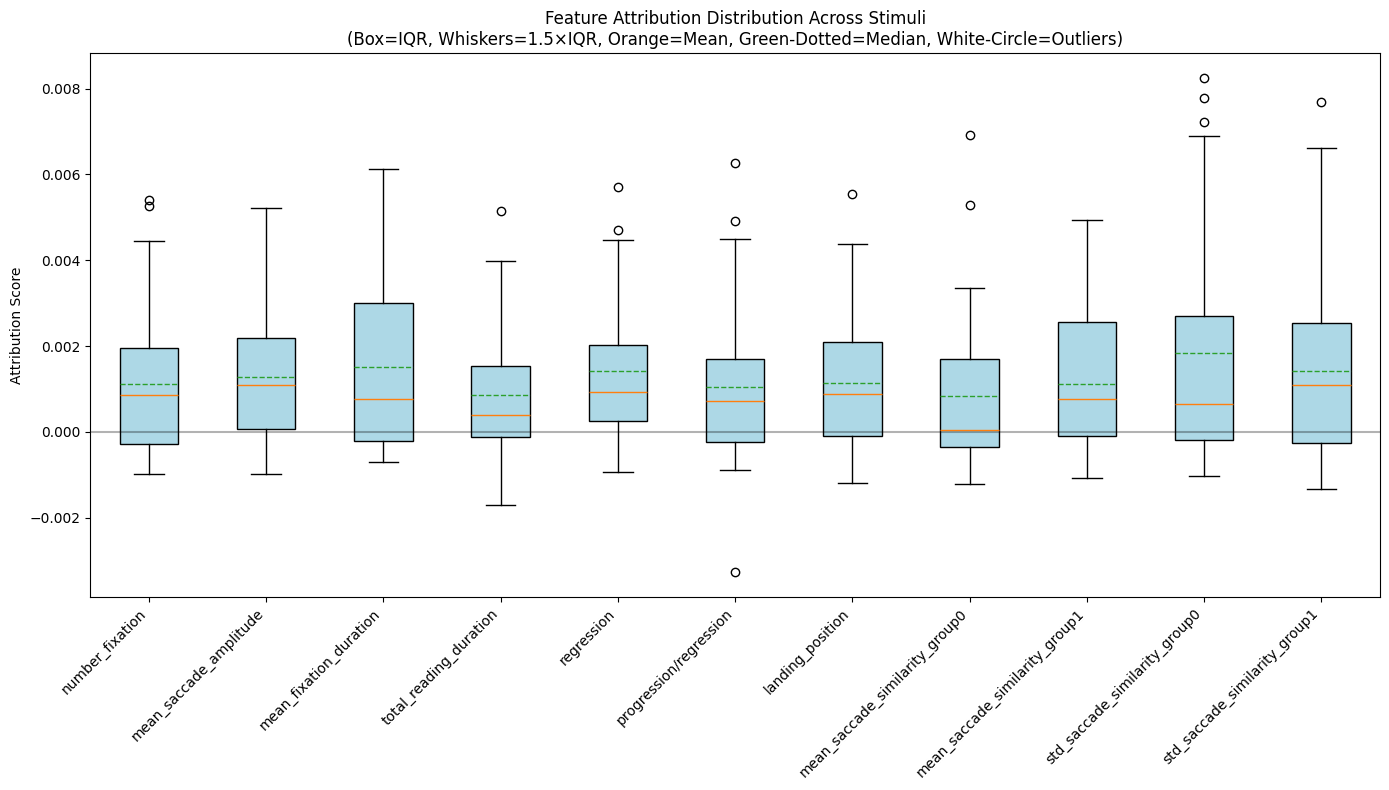


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0011, Std= 0.0017, Min=-0.0010, Max= 0.0054
mean_saccade_amplitude        : Mean= 0.0013, Std= 0.0015, Min=-0.0010, Max= 0.0052
mean_fixation_duration        : Mean= 0.0015, Std= 0.0020, Min=-0.0007, Max= 0.0061
total_reading_duration        : Mean= 0.0009, Std= 0.0016, Min=-0.0017, Max= 0.0051
regression                    : Mean= 0.0014, Std= 0.0017, Min=-0.0009, Max= 0.0057
progression/regression        : Mean= 0.0011, Std= 0.0020, Min=-0.0033, Max= 0.0063
landing_position              : Mean= 0.0012, Std= 0.0016, Min=-0.0012, Max= 0.0055
mean_saccade_similarity_group0: Mean= 0.0008, Std= 0.0018, Min=-0.0012, Max= 0.0069
mean_saccade_similarity_group1: Mean= 0.0011, Std= 0.0016, Min=-0.0011, Max= 0.0049
std_saccade_similarity_group0 : Mean= 0.0018, Std= 0.0028, Min=-0.0010, Max= 0.0082
std_saccade_similarity_group1 : Mean= 0.0014, Std= 0.0023, Min=-0.001

In [48]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original and Avg Similarity

In [49]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 9))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['mean_fixation_duration']
        vector_roi[s][3] = Features['total_reading_duration']
        vector_roi[s][4] = Features['regression']
        vector_roi[s][5] = Features['progression/regression']
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][8] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [50]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(270, 130)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(130, 65)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(65, 33) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(33, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7560681700706482
Epoch 5 loss: 0.42687296867370605
Epoch 10 loss: 0.3536112308502197
Epoch 15 loss: 0.33547139167785645
Epoch 0 loss: 0.7274436354637146
Epoch 5 loss: 0.39298561215400696
Epoch 10 loss: 0.3403986394405365
Epoch 15 loss: 0.3287496566772461
Epoch 0 loss: 0.7189813256263733
Epoch 5 loss: 0.40161454677581787
Epoch 10 loss: 0.3489745855331421
Epoch 15 loss: 0.321058064699173
Epoch 0 loss: 0.739450991153717
Epoch 5 loss: 0.41382333636283875
Epoch 10 loss: 0.3488032817840576
Epoch 15 loss: 0.3368793725967407
Epoch 0 loss: 0.7990352511405945
Epoch 5 loss: 0.42411234974861145
Epoch 10 loss: 0.3241881728172302
Epoch 15 loss: 0.3142588436603546
Epoch 0 loss: 0.7466012239456177
Epoch 5 loss: 0.4120056629180908
Epoch 10 loss: 0.34575608372688293
Epoch 15 loss: 0.3216872811317444
Epoch 0 loss: 0.7083931565284729
Epoch 5 loss: 0.38468706607818604
Epoch 10 loss: 0.3362588584423065
Epoch 15 loss: 0.3286653459072113
Epoch 0 loss: 0.6772335171699524
Epoc

In [51]:
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7560681700706482
Epoch 5 loss: 0.4654715955257416
Epoch 10 loss: 0.39476320147514343
Epoch 15 loss: 0.36206915974617004
Epoch 0 loss: 0.7274436354637146
Epoch 5 loss: 0.4269838333129883
Epoch 10 loss: 0.3800797760486603
Epoch 15 loss: 0.34573790431022644
Epoch 0 loss: 0.7189813256263733
Epoch 5 loss: 0.42278337478637695
Epoch 10 loss: 0.36961615085601807
Epoch 15 loss: 0.3364420533180237
Epoch 0 loss: 0.739450991153717
Epoch 5 loss: 0.4544743299484253
Epoch 10 loss: 0.3947467803955078
Epoch 15 loss: 0.3589306175708771
Epoch 0 loss: 0.7990352511405945
Epoch 5 loss: 0.4535251557826996
Epoch 10 loss: 0.3526020646095276
Epoch 15 loss: 0.32989731431007385
Epoch 0 loss: 0.7466012239456177
Epoch 5 loss: 0.4428262710571289
Epoch 10 loss: 0.3758049011230469
Epoch 15 loss: 0.35024702548980713
Epoch 0 loss: 0.7083931565284729
Epoch 5 loss: 0.41393521428108215
Epoch 10 loss: 0.3636155426502228
Epoch 15 loss: 0.33600950241088867
Epoch 0 loss: 0.6772335171699524
Ep

Approximation Error: 9.510680683888495e-05 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_22172\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


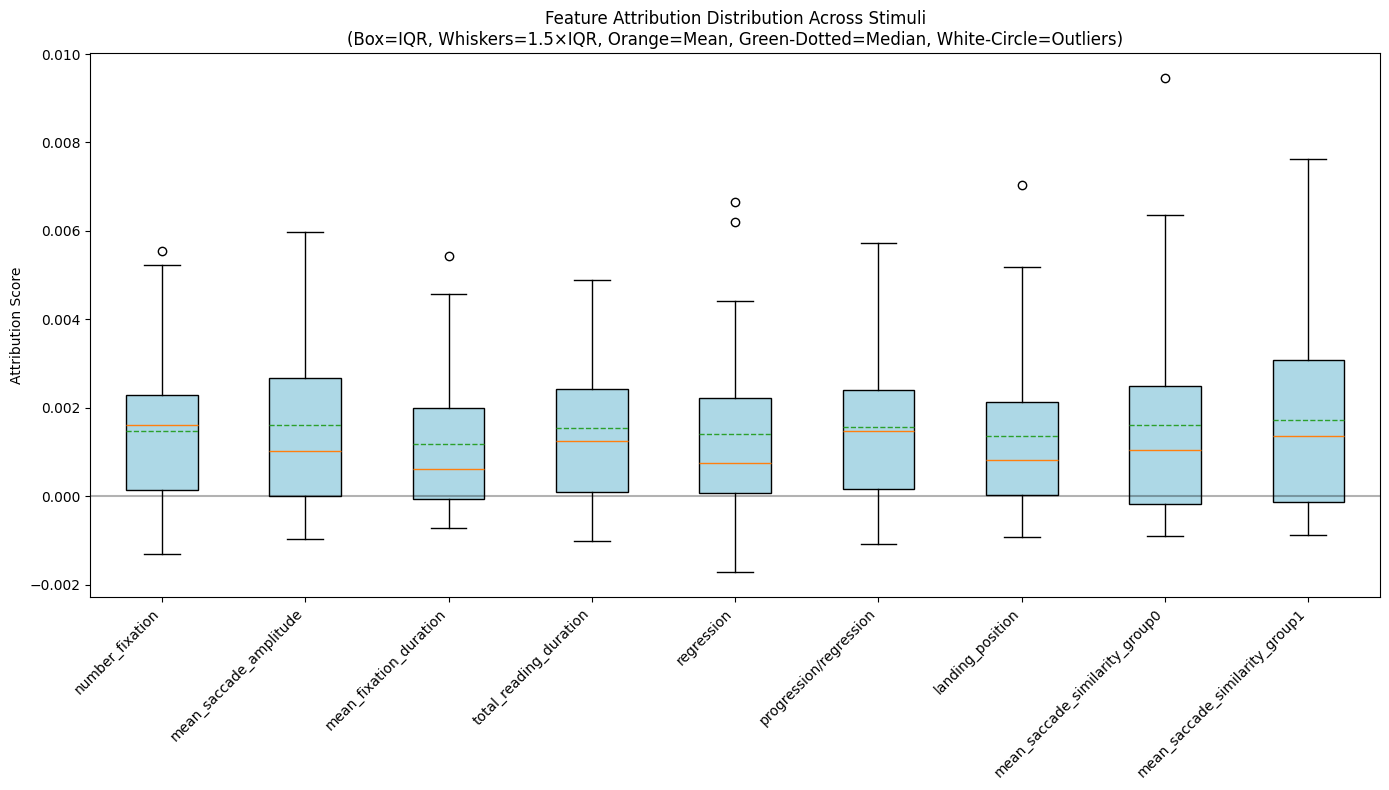


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0015, Std= 0.0018, Min=-0.0013, Max= 0.0056
mean_saccade_amplitude        : Mean= 0.0016, Std= 0.0020, Min=-0.0010, Max= 0.0060
mean_fixation_duration        : Mean= 0.0012, Std= 0.0017, Min=-0.0007, Max= 0.0054
total_reading_duration        : Mean= 0.0015, Std= 0.0017, Min=-0.0010, Max= 0.0049
regression                    : Mean= 0.0014, Std= 0.0020, Min=-0.0017, Max= 0.0067
progression/regression        : Mean= 0.0016, Std= 0.0017, Min=-0.0011, Max= 0.0057
landing_position              : Mean= 0.0014, Std= 0.0018, Min=-0.0009, Max= 0.0070
mean_saccade_similarity_group0: Mean= 0.0016, Std= 0.0024, Min=-0.0009, Max= 0.0095
mean_saccade_similarity_group1: Mean= 0.0017, Std= 0.0022, Min=-0.0009, Max= 0.0076


In [52]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original and Avg Similarity features (no mean saccade amplitude)

In [53]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 8))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_fixation_duration']
        vector_roi[s][2] = Features['total_reading_duration']
        vector_roi[s][3] = Features['regression']
        vector_roi[s][4] = Features['progression/regression']
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][3]
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][4]
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][5]

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [54]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(240, 160)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(160, 70)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(70, 35) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(35, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7814530730247498
Epoch 5 loss: 0.4098576307296753
Epoch 10 loss: 0.3457019627094269
Epoch 15 loss: 0.3279854953289032
Epoch 0 loss: 0.7536099553108215
Epoch 5 loss: 0.4295779764652252
Epoch 10 loss: 0.35202756524086
Epoch 15 loss: 0.3384711444377899
Epoch 0 loss: 0.7252454161643982
Epoch 5 loss: 0.43204352259635925
Epoch 10 loss: 0.34415900707244873
Epoch 15 loss: 0.3255096673965454
Epoch 0 loss: 0.6663725972175598
Epoch 5 loss: 0.3754464089870453
Epoch 10 loss: 0.3321744203567505
Epoch 15 loss: 0.31713905930519104
Epoch 0 loss: 0.674795389175415
Epoch 5 loss: 0.36475518345832825
Epoch 10 loss: 0.3344324231147766
Epoch 15 loss: 0.32294827699661255
Epoch 0 loss: 0.7119053602218628
Epoch 5 loss: 0.4180077612400055
Epoch 10 loss: 0.3320406377315521
Epoch 15 loss: 0.31463927030563354
Epoch 0 loss: 0.7460649013519287
Epoch 5 loss: 0.376414030790329
Epoch 10 loss: 0.34025833010673523
Epoch 15 loss: 0.31880638003349304
Epoch 0 loss: 0.7046167254447937
Epoch 

In [55]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7814530730247498
Epoch 5 loss: 0.4421943426132202
Epoch 10 loss: 0.36650893092155457
Epoch 15 loss: 0.34282365441322327
Epoch 0 loss: 0.7536099553108215
Epoch 5 loss: 0.45988473296165466
Epoch 10 loss: 0.39279472827911377
Epoch 15 loss: 0.3602319359779358
Epoch 0 loss: 0.7252454161643982
Epoch 5 loss: 0.46570852398872375
Epoch 10 loss: 0.3842379152774811
Epoch 15 loss: 0.342660516500473
Epoch 0 loss: 0.6663725972175598
Epoch 5 loss: 0.40246373414993286
Epoch 10 loss: 0.35314133763313293
Epoch 15 loss: 0.34035536646842957
Epoch 0 loss: 0.674795389175415
Epoch 5 loss: 0.3886626660823822
Epoch 10 loss: 0.3636106550693512
Epoch 15 loss: 0.342340350151062
Epoch 0 loss: 0.7119053602218628
Epoch 5 loss: 0.45713984966278076
Epoch 10 loss: 0.36948299407958984
Epoch 15 loss: 0.33299821615219116
Epoch 0 loss: 0.7460649013519287
Epoch 5 loss: 0.3962193429470062
Epoch 10 loss: 0.3729322552680969
Epoch 15 loss: 0.33412590622901917
Epoch 0 loss: 0.7046167254447937
E

Approximation Error: -0.00011897730291821063 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_22172\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


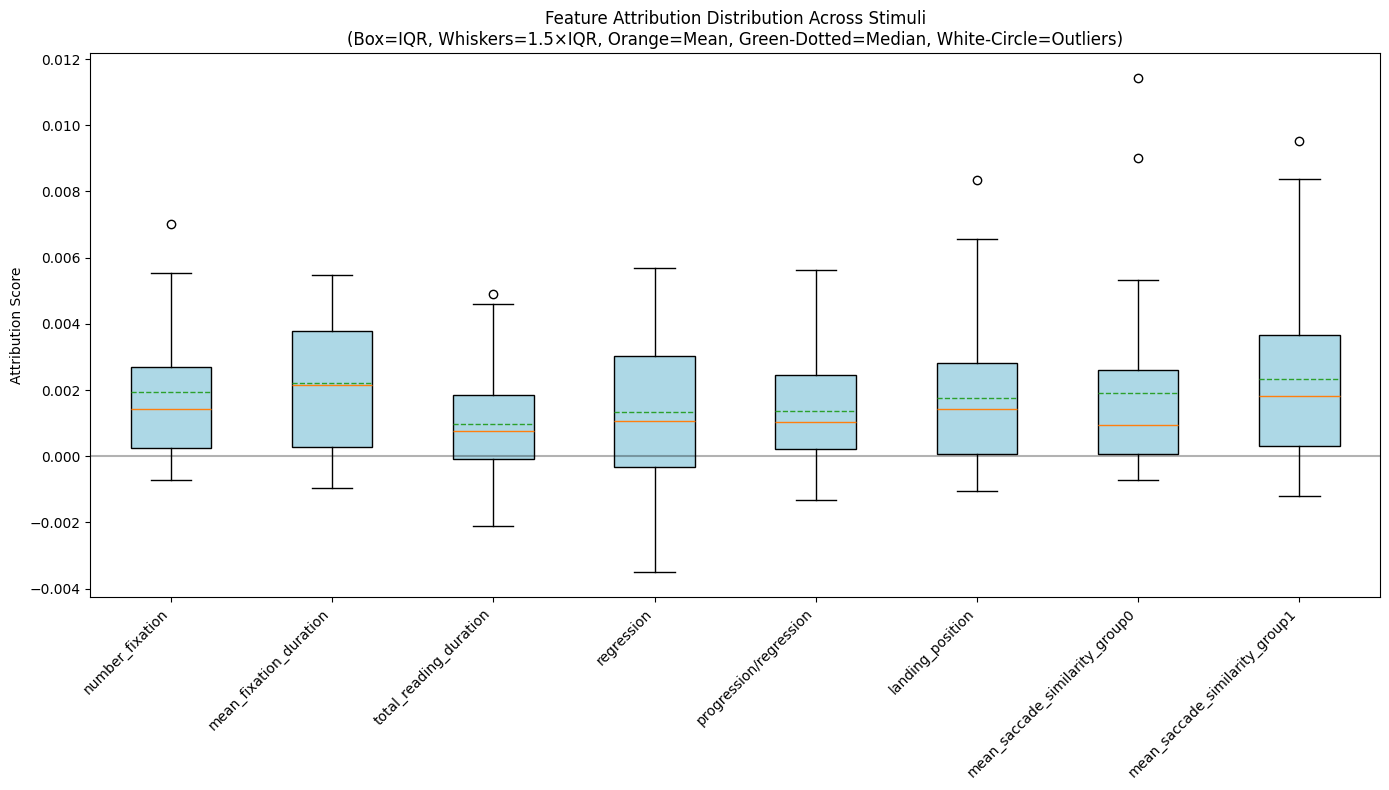


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0019, Std= 0.0019, Min=-0.0007, Max= 0.0070
mean_fixation_duration        : Mean= 0.0022, Std= 0.0020, Min=-0.0010, Max= 0.0055
total_reading_duration        : Mean= 0.0010, Std= 0.0016, Min=-0.0021, Max= 0.0049
regression                    : Mean= 0.0013, Std= 0.0022, Min=-0.0035, Max= 0.0057
progression/regression        : Mean= 0.0014, Std= 0.0017, Min=-0.0013, Max= 0.0056
landing_position              : Mean= 0.0018, Std= 0.0022, Min=-0.0011, Max= 0.0084
mean_saccade_similarity_group0: Mean= 0.0019, Std= 0.0028, Min=-0.0007, Max= 0.0114
mean_saccade_similarity_group1: Mean= 0.0023, Std= 0.0028, Min=-0.0012, Max= 0.0095


In [56]:
feature_names = [
    "number_fixation",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

In [57]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 10))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_fixation_duration']
        vector_roi[s][2] = Features['total_reading_duration']
        vector_roi[s][3] = Features['regression']
        vector_roi[s][4] = Features['progression/regression']
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1
        vector_roi[s][8] = SimAndFeatureVals[s][0][0][6] # std saccade similarity group 0
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][7] # std saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [58]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(300, 180)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(180, 70)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(70, 30) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(30, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7796605825424194
Epoch 5 loss: 0.4213411808013916
Epoch 10 loss: 0.35652846097946167
Epoch 15 loss: 0.32478490471839905
Epoch 0 loss: 0.7441117167472839
Epoch 5 loss: 0.39915305376052856
Epoch 10 loss: 0.35658156871795654
Epoch 15 loss: 0.3454151749610901
Epoch 0 loss: 0.7171748876571655
Epoch 5 loss: 0.4049893021583557
Epoch 10 loss: 0.3526665270328522
Epoch 15 loss: 0.3320479094982147
Epoch 0 loss: 0.7075453400611877
Epoch 5 loss: 0.4307543933391571
Epoch 10 loss: 0.37123942375183105
Epoch 15 loss: 0.32826870679855347
Epoch 0 loss: 0.7454947829246521
Epoch 5 loss: 0.40921735763549805
Epoch 10 loss: 0.31996768712997437
Epoch 15 loss: 0.3165692687034607
Epoch 0 loss: 0.7289536595344543
Epoch 5 loss: 0.43193769454956055
Epoch 10 loss: 0.3304636478424072
Epoch 15 loss: 0.3224729597568512
Epoch 0 loss: 0.7591943740844727
Epoch 5 loss: 0.40149936079978943
Epoch 10 loss: 0.3481338620185852
Epoch 15 loss: 0.3303944170475006
Epoch 0 loss: 0.7258273959159851


In [59]:
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7796605825424194
Epoch 5 loss: 0.4462621808052063
Epoch 10 loss: 0.38191911578178406
Epoch 15 loss: 0.33469194173812866
Epoch 0 loss: 0.7441117167472839
Epoch 5 loss: 0.4226861894130707
Epoch 10 loss: 0.3801138699054718
Epoch 15 loss: 0.35968780517578125
Epoch 0 loss: 0.7171748876571655
Epoch 5 loss: 0.4253424108028412
Epoch 10 loss: 0.3761541545391083
Epoch 15 loss: 0.3328067660331726
Epoch 0 loss: 0.7075453400611877
Epoch 5 loss: 0.4537043571472168
Epoch 10 loss: 0.39113572239875793
Epoch 15 loss: 0.34634876251220703
Epoch 0 loss: 0.7454947829246521
Epoch 5 loss: 0.42973968386650085
Epoch 10 loss: 0.3373933732509613
Epoch 15 loss: 0.32329845428466797
Epoch 0 loss: 0.7289536595344543
Epoch 5 loss: 0.46548905968666077
Epoch 10 loss: 0.3690624237060547
Epoch 15 loss: 0.3488585948944092
Epoch 0 loss: 0.7591943740844727
Epoch 5 loss: 0.4289558529853821
Epoch 10 loss: 0.3683411180973053
Epoch 15 loss: 0.3409688472747803
Epoch 0 loss: 0.7258273959159851
Ep

Approximation Error: -1.0498489245946985e-05 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_22172\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


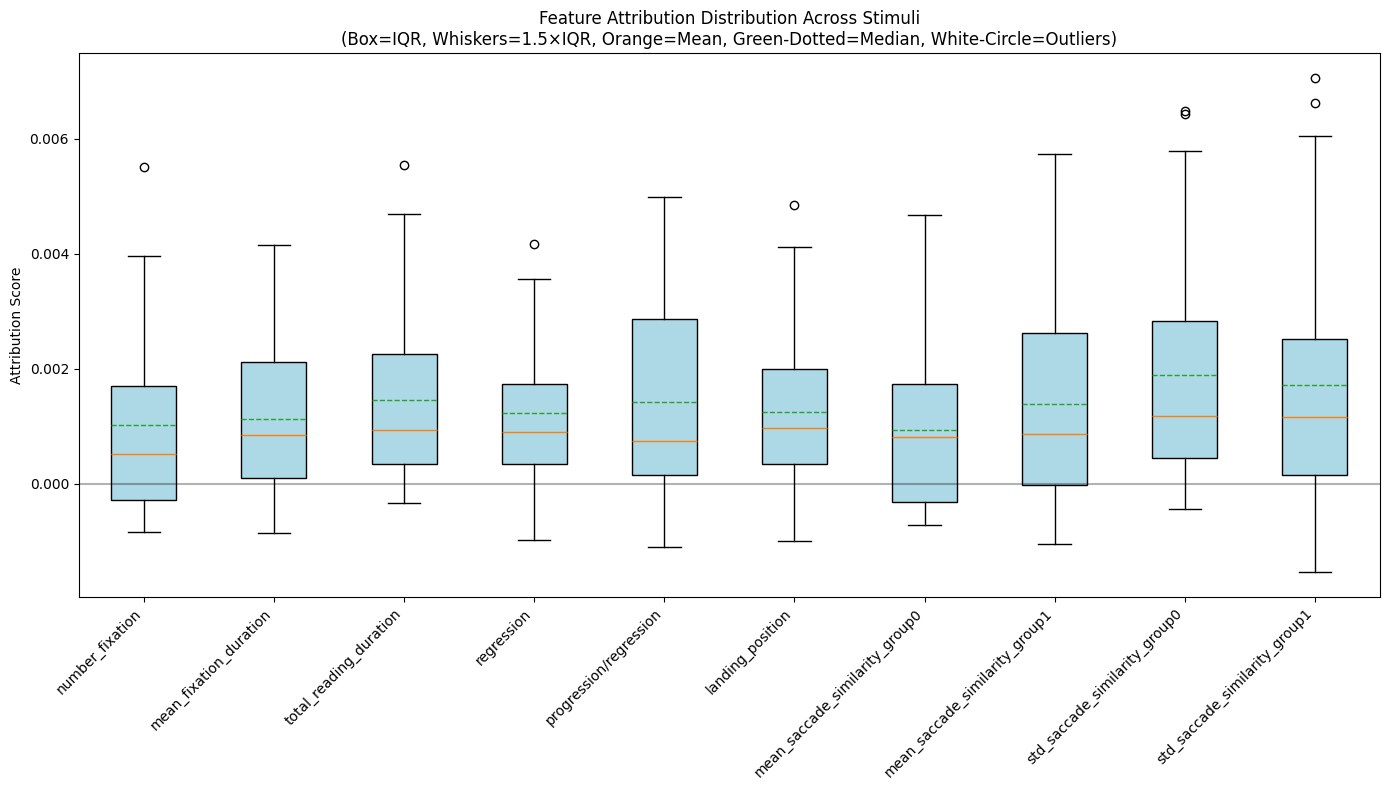


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0010, Std= 0.0015, Min=-0.0008, Max= 0.0055
mean_fixation_duration        : Mean= 0.0011, Std= 0.0014, Min=-0.0009, Max= 0.0041
total_reading_duration        : Mean= 0.0014, Std= 0.0015, Min=-0.0003, Max= 0.0055
regression                    : Mean= 0.0012, Std= 0.0012, Min=-0.0010, Max= 0.0042
progression/regression        : Mean= 0.0014, Std= 0.0017, Min=-0.0011, Max= 0.0050
landing_position              : Mean= 0.0012, Std= 0.0015, Min=-0.0010, Max= 0.0049
mean_saccade_similarity_group0: Mean= 0.0009, Std= 0.0014, Min=-0.0007, Max= 0.0047
mean_saccade_similarity_group1: Mean= 0.0014, Std= 0.0018, Min=-0.0011, Max= 0.0057
std_saccade_similarity_group0 : Mean= 0.0019, Std= 0.0020, Min=-0.0004, Max= 0.0065
std_saccade_similarity_group1 : Mean= 0.0017, Std= 0.0022, Min=-0.0015, Max= 0.0071


In [60]:
feature_names = [
    "number_fixation",
    "mean_fixation_duration", 
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### 

#### All features

In [61]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 14))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['std_fixation_duration']
        vector_roi[s][3] = Features['mean_fixation_duration']
        vector_roi[s][4] = Features['std_fixation_duration']
        vector_roi[s][5] = Features['total_reading_duration']
        vector_roi[s][6] = Features['regression']
        vector_roi[s][7] = Features['progression/regression']
        vector_roi[s][8] = Features['fixation_entropy']
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][3]
        vector_roi[s][10] = SimAndFeatureVals[s][0][0][4]
        vector_roi[s][11] = SimAndFeatureVals[s][0][0][5]
        vector_roi[s][12] = SimAndFeatureVals[s][0][0][6]
        vector_roi[s][13] = SimAndFeatureVals[s][0][0][7]
        
    
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [62]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(420, 210)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(210, 105)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(105, 53) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(53, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7748320698738098
Epoch 5 loss: 0.3868213891983032
Epoch 10 loss: 0.32761695981025696
Epoch 15 loss: 0.31615838408470154
Epoch 0 loss: 0.751507043838501
Epoch 5 loss: 0.3841383755207062
Epoch 10 loss: 0.32501596212387085
Epoch 15 loss: 0.314508855342865
Epoch 0 loss: 0.7712382674217224
Epoch 5 loss: 0.36176663637161255
Epoch 10 loss: 0.3263181447982788
Epoch 15 loss: 0.31471678614616394
Epoch 0 loss: 0.6906514167785645
Epoch 5 loss: 0.364488422870636
Epoch 10 loss: 0.33553043007850647
Epoch 15 loss: 0.31404510140419006
Epoch 0 loss: 0.6825507283210754
Epoch 5 loss: 0.3557804524898529
Epoch 10 loss: 0.3185320794582367
Epoch 15 loss: 0.31429144740104675
Epoch 0 loss: 0.7217414975166321
Epoch 5 loss: 0.37732669711112976
Epoch 10 loss: 0.32610461115837097
Epoch 15 loss: 0.31469136476516724
Epoch 0 loss: 0.6873859167098999
Epoch 5 loss: 0.3750734329223633
Epoch 10 loss: 0.3265083432197571
Epoch 15 loss: 0.3153894543647766
Epoch 0 loss: 0.7894171476364136
Ep

In [63]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7748320698738098
Epoch 5 loss: 0.41402289271354675
Epoch 10 loss: 0.3582891821861267
Epoch 15 loss: 0.3366979658603668
Epoch 0 loss: 0.751507043838501
Epoch 5 loss: 0.40871304273605347
Epoch 10 loss: 0.33950212597846985
Epoch 15 loss: 0.3287034034729004
Epoch 0 loss: 0.7712382674217224
Epoch 5 loss: 0.37529104948043823
Epoch 10 loss: 0.3510511517524719
Epoch 15 loss: 0.32747146487236023
Epoch 0 loss: 0.6906514167785645
Epoch 5 loss: 0.39153167605400085
Epoch 10 loss: 0.3753349184989929
Epoch 15 loss: 0.3256562054157257
Epoch 0 loss: 0.6825507283210754
Epoch 5 loss: 0.3690343201160431
Epoch 10 loss: 0.33558163046836853
Epoch 15 loss: 0.32047611474990845
Epoch 0 loss: 0.7217414975166321
Epoch 5 loss: 0.4061087667942047
Epoch 10 loss: 0.34792983531951904
Epoch 15 loss: 0.32907673716545105
Epoch 0 loss: 0.6873859167098999
Epoch 5 loss: 0.38529592752456665
Epoch 10 loss: 0.3426748514175415
Epoch 15 loss: 0.3267461657524109
Epoch 0 loss: 0.7894171476364136


Approximation Error: -0.00013622893311548978 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_22172\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


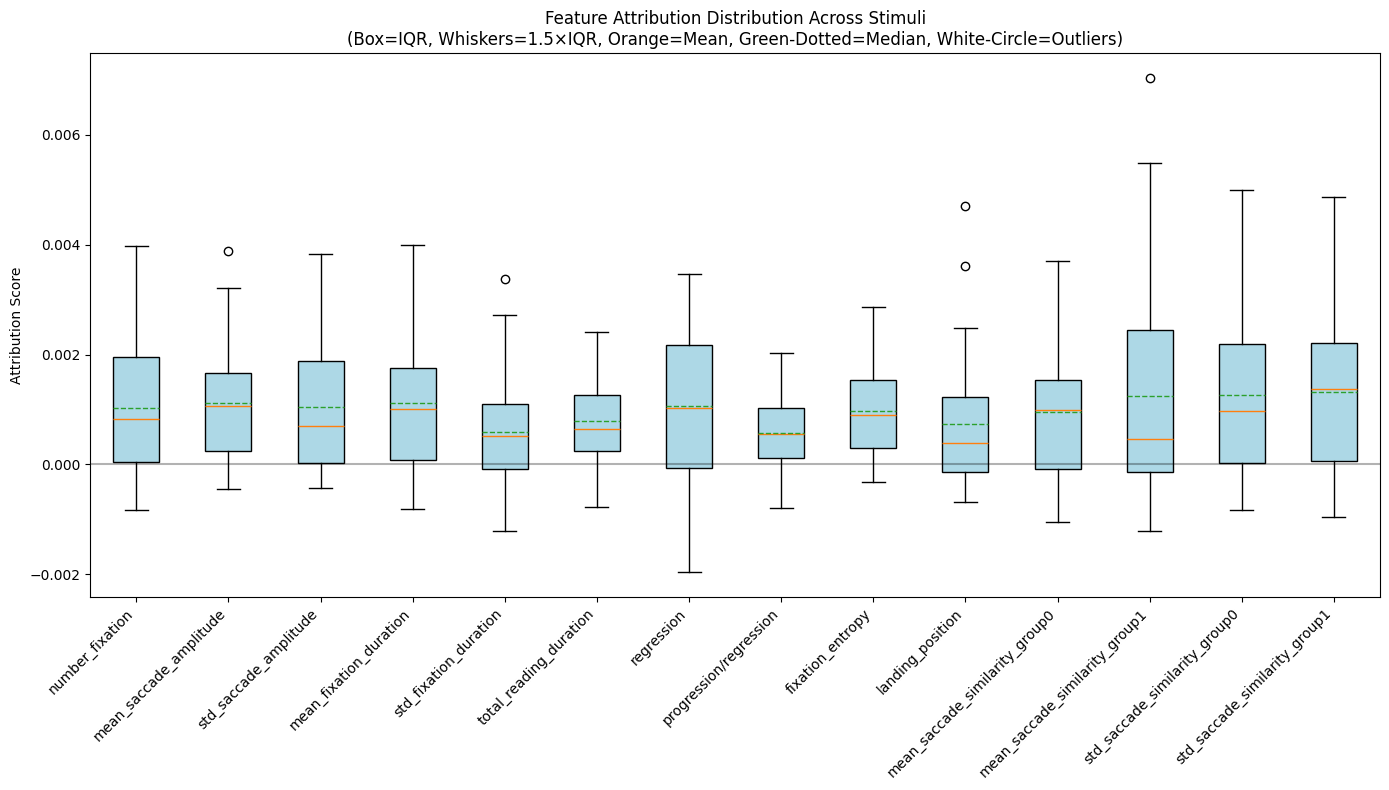


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0010, Std= 0.0013, Min=-0.0008, Max= 0.0040
mean_saccade_amplitude        : Mean= 0.0011, Std= 0.0012, Min=-0.0005, Max= 0.0039
std_saccade_amplitude         : Mean= 0.0010, Std= 0.0011, Min=-0.0004, Max= 0.0038
mean_fixation_duration        : Mean= 0.0011, Std= 0.0013, Min=-0.0008, Max= 0.0040
std_fixation_duration         : Mean= 0.0006, Std= 0.0010, Min=-0.0012, Max= 0.0034
total_reading_duration        : Mean= 0.0008, Std= 0.0007, Min=-0.0008, Max= 0.0024
regression                    : Mean= 0.0011, Std= 0.0013, Min=-0.0020, Max= 0.0035
progression/regression        : Mean= 0.0006, Std= 0.0007, Min=-0.0008, Max= 0.0020
fixation_entropy              : Mean= 0.0010, Std= 0.0009, Min=-0.0003, Max= 0.0029
landing_position              : Mean= 0.0007, Std= 0.0013, Min=-0.0007, Max= 0.0047
mean_saccade_similarity_group0: Mean= 0.0010, Std= 0.0012, Min=-0.001

In [64]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "std_saccade_amplitude",
    "mean_fixation_duration",
    "std_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "fixation_entropy",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

---

In [65]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 8))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['regression']
        vector_roi[s][2] = Features['progression/regression']
        vector_roi[s][3] = SimAndFeatureVals[s][0][0][3]
        vector_roi[s][4] = SimAndFeatureVals[s][0][0][4]
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][5] 
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][6] 
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][7]

    if vec.size != 0: 
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [66]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(240, 120)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(120, 60)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(60, 30) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(30, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    

results = train_test_pipeline(stimuli)
results = train_test_pipeline(stimuli,0.5)

Using device: cuda
Epoch 0 loss: 0.7104905247688293
Epoch 5 loss: 0.48041948676109314
Epoch 10 loss: 0.38752251863479614
Epoch 15 loss: 0.35889774560928345
Epoch 0 loss: 0.7480329871177673
Epoch 5 loss: 0.4738844931125641
Epoch 10 loss: 0.40097180008888245
Epoch 15 loss: 0.37008535861968994
Epoch 0 loss: 0.7217418551445007
Epoch 5 loss: 0.4676184356212616
Epoch 10 loss: 0.3911729156970978
Epoch 15 loss: 0.37548986077308655
Epoch 0 loss: 0.6614705324172974
Epoch 5 loss: 0.47890302538871765
Epoch 10 loss: 0.3829914927482605
Epoch 15 loss: 0.3560549020767212
Epoch 0 loss: 0.7353712320327759
Epoch 5 loss: 0.45924028754234314
Epoch 10 loss: 0.41291943192481995
Epoch 15 loss: 0.3567335307598114
Epoch 0 loss: 0.6816647052764893
Epoch 5 loss: 0.4210074245929718
Epoch 10 loss: 0.3738653063774109
Epoch 15 loss: 0.3537309765815735
Epoch 0 loss: 0.7480068206787109
Epoch 5 loss: 0.46946319937705994
Epoch 10 loss: 0.3742073178291321
Epoch 15 loss: 0.35536932945251465
Epoch 0 loss: 0.7790510058403015